In [3]:
import pandas as pd
data= pd.read_csv('微博内容混合.csv', encoding='utf8',engine='python')

In [4]:
data
# 用空字符串('')替换纯数字('123')
data = data.replace('^[0-9]*$', '')



In [5]:
# 用空字符串('')替换('111','aaa','....')等
data = data.replace(r'^(.)\1*$', '')


In [6]:
# 用空字符串('')替换('2020/11/20 20:00:00')等
data = data.replace(r'\d+/\d+/\d+ \d+:\d+:\d+', '')


In [7]:
#####
# 标题可视化
import jieba, re
import collections                  # 词频统计库
# 读取title，并连接成长文本
file = data.loc[:,'list'].dropna(how='any')  # 去掉空值
string_data1 = ''.join(i for i in file)  # 把所有字符串连接成一个长文本
# 文本预处理
#pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式（空格等）
#pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|【|】[a-zA-Z0-9]"') # 定义正则表达式匹配模式（空格等）
pattern = re.compile(u'[\t|\n|\.|\-|\:|\;|\)|\(|\?|【|】|##|    |\u200b|a-zA-Z0-9|\"]') # 定义正则表达式匹配模式（空格等）
string_data1 = re.sub(pattern, '', string_data1)     # 将符合模式的字符去除
# 文本分词
file_userdict = 'test_xy.txt' #此处文件名为用户自定义的文件名，内容为不想被分开的词
jieba.load_userdict(file_userdict)
seg_list_exact = jieba.cut(string_data1, cut_all=False, HMM=True)    # 精确模式分词+HMM
object_list= []
# 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open('stop_words_xy.txt', 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表
        

# 词频统计
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(40)    # 获取前number个最高频的词
word_count = pd.DataFrame(word_counts_top,columns=['word', 'count'])
word_count
#包装看（整箱受欢迎>袋>礼盒）、、吃法（即食》速食（泡面燕麦那些，））
#口味上（卤味>香辣>麻辣）

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\吕晓婷\AppData\Local\Temp\jieba.cache
Loading model cost 0.648 seconds.
Prefix dict has been built successfully.


,word,count
0,教育,1593
1,双减,1375
2,政策,1240
3,师范生,1064
4,技能,1008
5,学习,809
6,学生,703
7,发现自己,547
8,教育部,528
9,教师,487


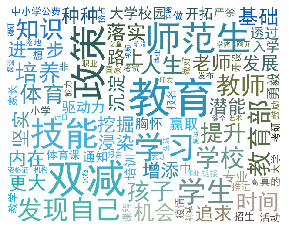

In [11]:
#####
# 词云图
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import numpy as np # numpy数据处理库
import matplotlib.pyplot as plt # 图像展示库
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mask = np.array(Image.open('E:\qqsj\ms\背景2.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='SimHei.ttf', # 设置字体格式
    background_color="white",  # 背景颜色
    mask=mask, # 设置背景图
    max_words=100, # 最多显示词数
    max_font_size=100, # 字体最大值
    random_state=50,  # 设置有多少种随机生成状态，即有多少种配色
    width=2500, height=1920,
    margin=3,  # 设置图片默认的大小,margin为词语边缘距离
)
wc.generate_from_frequencies(word_counts) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.axis("off")  

plt.imshow(wc) # 显示词云